In [1]:
from ipywidgets import interact, widget, interact_manual

import ipywidgets as widgets

from IPython.display import display, Math
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import collections

# von Neumann-Morgenstern Theorem


Suppose that $X$ is a finite set of *prizes* or *outcomes*.   Suppose that $Y=\{x_1,\ldots, x_n\}$ is a set of $n$ elements from $X$.  A **lottery** on $Y$ is denoted as follows: $ [x_1:p_1,x_2:p_2,\ldots, x_n:p_n ] $ where each $p_i\ge 0$ and  $\sum_{i=1}^n p_i=1$.  Let $\mathcal{L}(X)$ be the set of lotteries on  $X$ (we often write $\mathcal{L}$ instead of $\mathcal{L}(X)$ to simplify notation).  There are two technical issues that need to be addressed.   

1.  We can identify elements $x\in X$ with lotteries $[x:1]$.    Thus, we may abuse notation and  say that "$X$ is contained in $\mathcal{L}$".  
2.  A  **compound lottery**.  Suppose that $L_1, \ldots, L_n$ are lotteries. Then, $[L_1:p_1,\ldots, L_n:p_n]$ is  the **compound lottery**, where $\sum_{i=1}^n p_i=1$.


We are interested in decision makers that have a rational preference $(P, I)$ on the set $\mathcal{L}$ of lotteries (for some fixed set $X$).  Given two lotteries $L_1\in \mathcal{L}$ and $L_2\in\mathcal{L}$, we assume that a decision maker has one of the following opinions: 

1. The decision maker strict prefers $L_1$ over  $L_2$ (denoted $L_1\mathrel{P} L_2$).
2. The decision maker strict prefers $L_2$ over  $L_1$ (denoted $L_2\mathrel{P} L_1$)
3. The decision maker is indifferent between $L_1$ and  $L_2$  (denoted $L_1\mathrel{I} L_2$).

   
One way to compare lotteries is to assign a number of each lottery and rank the lotteries according to the number assigned to them.   That is, for a set of lotteries $\mathcal{L}$ and a function $V:\mathcal{L}\rightarrow\mathbb{R}$ assigning a real number of teach lottery, define the relation $R_V$ as follows: for all $L, L'\in \mathcal{L}$, 

$$L\mathrel{R_V} L'\text{ if, and only if, }V(L)\ge V(L').$$  

One way to define a function $V:\mathcal{L}\rightarrow\mathbb{R}$ for the set of lotteries $\mathcal{L}$ on $X$ is to start with a utility function on the set of prizes $u:X\rightarrow\mathbb{R}$ and then  for each $L\in\mathcal{L}(X)$ define $V(L)$ as some function combining the probabilities in $L$ with the utility of the prizes in $L$. 

For example, let $u:X\rightarrow\mathbb{R}$ be a utility function on $X$.   The following are examples of different ways to assign a value to lotteries: 

1. $V_1:\mathcal{L}\rightarrow\mathbb{R}$ is the function where for each $L=[x_1:p_1,\ldots, x_n:p_n]$, $V_1(L) = \min\{u(x_1), \ldots, u(x_n)\}$
1. $V_2:\mathcal{L}\rightarrow\mathbb{R}$ is the function where for each $L=[x_1:p_1,\ldots, x_n:p_n]$, $V_2(L) = \sum_{i=1}^n u(x_i)$
1. $V_3:\mathcal{L}\rightarrow\mathbb{R}$ is the function where for each $L=[x_1:p_1,\ldots, x_n:p_n]$, $V_3(L) = \sum_{i=1}^n p_i * u(x_i)$
1. $V_4:\mathcal{L}\rightarrow\mathbb{R}$ is the function where for each $L=[x_1:p_1,\ldots, x_n:p_n]$, $V_4(L) = (\sum_{i=1}^n p_i * u(x_i)) + 0.2$
1. $V_5:\mathcal{L}\rightarrow\mathbb{R}$ is the function where for each $L=[x_1:p_1,\ldots, x_n:p_n]$, $V_5(L) = (\sum_{i=1}^n p_i * 2 * u(x_i)) + 0.2$
1. $V_6:\mathcal{L}\rightarrow\mathbb{R}$ is the function where for each $L=[x_1:p_1,\ldots, x_n:p_n]$, $V_7(L) = (\sum_{i=1}^n p_i * u(x_i))^4$
1. $V_7:\mathcal{L}\rightarrow\mathbb{R}$ is the function where for each $L=[x_1:p_1,\ldots, x_n:p_n]$, $V_7(L) = (\sum_{i=1}^n p_i^2 * u(x_i))$

We can also define functions that treat sure-things different than other lotteries: Let $V_8:\mathcal{L}\rightarrow\mathbb{R}$ be  the function where: 

$V_8(L)=  u(z)$   if $L$ is equivalent to $[z:1]$ for some $z\in X$, otherwise $V_8(L) = \sum_{i=1}^n p_i u(x_i) + 0.2$  if $L=[x_1:p_1,\ldots, x_n:p_n]$ with at least two non-zero probabilities.


Note that function $V_3$ is the **expected utility** of lotteries with respect to the utility function $u$.  The key property of the expected utility valuation function is that it is linear: 

A function $V:\mathcal{L}\rightarrow \mathbb{R}$ is **linear** provided that for all $L=[L_1:p_1, \ldots, L_n:p_n]$, $V(L)=\sum_{i=1}^n p_i * V(L_i)$. 

The functions $V_3, V_4$ and $V_5$ are all linear.  

To illustrate the above functions, let $X=\{a,b,c\}$ and consider the utility function $u:X\rightarrow \mathbb{R}$ where  $u(a)=1$, $u(b)=0.5$ and $u(c)=0$.  Enter the probability for the prizes to see the different values associated with the lottery. 

In [2]:
a="a"
b="b"
c="c"
util={a:1, b:0.5, c:0}
X=[a,b,c]

def v1(ps):
    """V_1"""
    return min([util[a] for idx,a in enumerate(X) if ps[idx] != 0])
def v2(ps):
    """V_2"""
    return sum([util[a] for idx,a in enumerate(X) if ps[idx] != 0])
def v3(ps):
    """V_3"""
    return sum([ps[idx] * util[a] for idx,a in enumerate(X)])
def v4(ps):
    """V_4"""
    return sum([ps[idx] * util[a] for idx,a in enumerate(X)]) + 0.2
def v5(ps):
    """V_5"""
    return sum([ps[idx] * 2 * util[a] for idx,a in enumerate(X)]) + 0.2
def v6(ps):
    """V_6"""
    return (sum([ps[idx] * util[a] for idx,a in enumerate(X)]))**4
def v7(ps):
    """V_7"""
    return (sum([ps[idx]**2 * util[a] for idx,a in enumerate(X)]))
def V8(ps):
    """V_8"""
    if any([ps[idx] == 1 for idx,a in enumerate(X)]):
        return [util[a] for idx,a in enumerate(X) if ps[idx] == 1][0]
    else: 
        return (sum([ps[idx] * util[a] for idx,a in enumerate(X)])) + 0.2

def find_value(p1, p2, p3):
    ps=[p1, p2, p3]
    print("\n")
    if math.fabs(sum(ps) - 1.0) > 0.00000000001: 
        print(f"{ps} is not a probability")
    else:
        display(Math("V_1(L) = \min(" + str(", ".join([str(util[a]) for idx, a in enumerate(X) if ps[idx] != 0])) + ") = " + str(v1(ps))))
        display(Math("V_2(L) = " + str("+ ".join([str(util[a]) for idx, a in enumerate(X) if ps[idx] != 0])) + " = "+ str(v2(ps))))
        display(Math("V_3(L) = " + str("+ ".join([str(ps[idx]) + "* " + str(util[a]) for idx, a in enumerate(X) if ps[idx] != 0])) + " = "+ str(round(v3(ps),3))))
        display(Math("V_4(L) = " + str("+ ".join([str(ps[idx]) + "* " + str(util[a]) for idx, a in enumerate(X) if ps[idx] != 0])) + "+ 0.2" + " = "+ str(round(v4(ps), 3))))
        display(Math("V_5(L) = " + str("+ ".join([str(ps[idx]) + "* 2 *" + str(util[a]) for idx, a in enumerate(X) if ps[idx] != 0])) + "+ 0.2" + " = "+ str(round(v5(ps), 3))))
        display(Math("V_6(L) = ("  + str("+ ".join([str(ps[idx]) + "* " +  str(util[a]) for idx, a in enumerate(X) if ps[idx] != 0])) + ")^4 = "+ str(round(v6(ps), 3))))
        display(Math("V_7(L) = ("  + str("+ ".join([str(ps[idx]) + "^2 * " +  str(util[a]) for idx, a in enumerate(X) if ps[idx] != 0])) + ") = "+ str(round(v7(ps), 3))))
        if any([ps[idx] == 1 for idx,a in enumerate(X)]):
            display(Math("V_8(L) = " + str(V8(ps))))
        else: 
            display(Math("V_8(L) = " + str("+ ".join([str(ps[idx]) + "* " + str(util[a]) for idx, a in enumerate(X) if ps[idx] != 0])) + "+ 0.2 = "+ str(round(V8(ps),3))))
interact_manual(find_value, 
        p1 = widgets.FloatSlider(min=0.0, max=1.0, value=0.0, step=0.01, description='$p(a)=$'),
        p2 = widgets.FloatSlider(min=0.0, max=1.0, value=0.0, step=0.01, description='$p(b)=$'),
        p3 = widgets.FloatSlider(min=0.0, max=1.0, value=0.0, step=0.01, description='$p(c)=$'))
print()

interactive(children=(FloatSlider(value=0.0, description='$p(a)=$', max=1.0, step=0.01), FloatSlider(value=0.0…

It is also useful to compare the above 8 value functions based on the value that assign to the lottery $L=[a:p, b:1-p]$ as $p$ ranges from 0 to 1. 

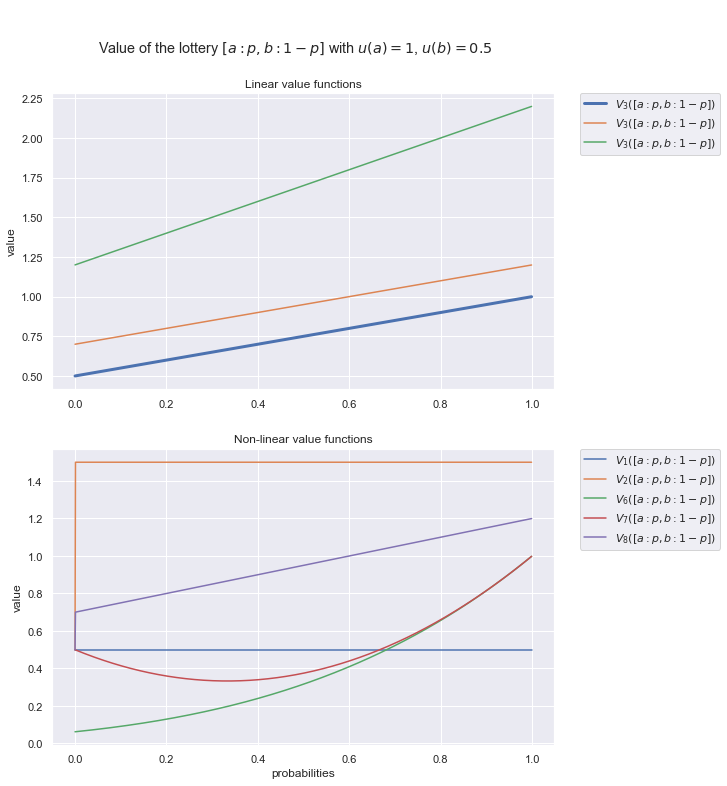

In [3]:
sns.set()
xs = np.arange(0.0, 1.0, 0.001)
fig, ax = plt.subplots(nrows=2, figsize=(9,12))

ys=[v3([x, 1-x, 0]) for x in xs]
ax[0].plot(xs, ys, lw=3, label="$" + v3.__doc__+ "([a:p, b:1-p])$")

ys=[v4([x, 1-x, 0]) for x in xs]
ax[0].plot(xs, ys, lw=1.5, label="$" + v3.__doc__+ "([a:p, b:1-p])$")

ys=[v5([x, 1-x, 0]) for x in xs]
ax[0].plot(xs, ys, lw=1.5, label="$" + v3.__doc__+ "([a:p, b:1-p])$")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax[0].set(xlabel='', ylabel='value',
       title='Linear value functions')

for v in [v1,v2,v6,v7, V8]:
    ys=[v([x, 1-x, 0]) for x in xs]
    ax[1].plot(xs, ys, lw=1.5, label="$" + v.__doc__+ "([a:p, b:1-p])$")

ax[1].set(xlabel='probabilities', ylabel='value',
       title='Non-linear value functions')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.suptitle("\n\nValue of the lottery $[a:p, b:1-p]$ with $u(a)=1$, $u(b)=0.5$")

plt.show()


The von Neumann-Morgenstern Theorem characterizes the  relations on the set of lotteries $\mathcal{L}$  that can be represented by *linear* utility functions. Suppose that $X$ is a set,  $\mathcal{L}$ is the set of lotteries on $X$, and $R$ is a relation on $\mathcal{L}$.  von Neumann and Morgenstern consider the following 4 axioms. 


The first axiom is the standard assumption that rational preferences are complete and transitive: 

**Preference**: The relation $R$ is a complete and transitive relation on $\mathcal{L}$. 


The next two axioms play a central role  von Neumann-Morgenstern theorem.   
 

**Independence**  For all $L_1, L_2, L_3\in\mathcal{L}$ and $p\in (0,1] $, 

1. $L_1\mathrel{P} L_2$ if, and only if, $[L_1:p, L_3:(1-p)]\mathrel{P} [L_2:p, L_3:(1-p)]$.


**Continuity**  For all $L_1, L_2, L_3\in\mathcal{L}$, if $L_1\succ L_2\succ L_3$, then there exists $p\in (0,1)$ such that  $L_2\sim [L_1:p, L_3:(1-p)]$. 


Both axioms have been criticized as  *rationality* principles.  For example, consider the continuity axiom.  Consider the prizes $x=$ "win 1000", $y=$ "win 100" and $z=$ "get hit by a car".   Clearly, it is natural to assume that a decision make would have the preference $x\succ y\succ z$.   Now, Continuity implies that there is some number $a\in (0,1)$ such that $[x:a, z:(1-a)]\succ [y:1]$.  Thus, the decision maker would strictly prefer a lottery in which there is some non-zero chance of getting hit by a car to a lottery in which gives a guaranteed payoff of \$100.  Arguably, many people would not hold such a preference no matter how small the chance is of getting hit by a car.       Here we bracket this are related philosophical discussions about the  above axioms and focus on what follows from the axioms. The first observation is a straightforward consequence of Independence and the assumption that the preference ordering is complete. 

**Lemma** Suppose that $R$ is a preference relation on $\mathcal{L}$ satisfying the Independence axiom.   For all lotteries $L_1, L_2, L_3\in \mathcal{L}$ and real numbers $a\in [0,1]$, if $L_1\mathcal{I} L_2$, then $[L_1:a,L_3:(1-a)]\mathcal{I} [L_2:a, L_3:(1-a)]$. 	
 

The second observation is that   decision makers prefers lotteries in which there is a better chance of winning a more  preferred prize.

**Lemma** If $R$ is a preference relation on $\mathcal{L}$ satisfying Compound Lotteries and  Independence, then for all lotteries $L_1, L_2\in \mathcal{L}$, if $L_1\mathrel{P} L_2$, and  $1\ge a > b\ge 0$, then $[L_1:a, L_2:(1-a)] \mathrel{P} [L_1:b, L_2:(1-b)]$. 
 

The last axiom concerns *compound lotteries*: 

**Compound Lotteries**:   Suppose that $[L_1:p_1,\ldots, L_n,p_n]$ is a compound lottery, where for each $i=1,\ldots, n$, we have $L_i=[x_1:p_1^i,\ldots, x_n:p_n^i]$.  Then, 
$$[L_1:p_1,\ldots, L_n,p_n]\mathrel{I} [x_1:(p_1p_1^1+ p_2p_1^2 + \cdots p_np_1^n),\ldots, x_1:(p_1p_n^1+ p_2p_n^2 + \cdots p_np_n^n)]$$   


The axiom means that decision makers do not get any utility from the "thrill of gambling". That is, what matters to the decision maker is how likely she is to receive prizes that she prefers. For example, suppose that    $L_1=[x:1]$ and $L_2=[y_1:0.2, y_2:0.4, y_3:0.4]$.   Then, the decision maker is assumed to be indifferent between the compound lottery $L_3=[L_1:0.3, L_2:0.7]$ and the simple lottery $L_4=[x:0.3, y_1:0.14, y_2:0.28, y_3:0.28]$.

**The von Neumann-Morgentern Representation Theorem**   A binary relation $R$ on $\mathcal{L}$ satisfies Preference, Independence, Continuity and Compound Lotteries iff  $R$ is representable by a linear utility function $V:\mathcal{L}\rightarrow\mathbb{R}$. 

 Moreover,   $V':\mathcal{L}\rightarrow\mathbb{R}$ represents $R$  if, and only if,  there exists real numbers $c>0$ and $d$ such that for all lotteries $L\in\mathcal{L}$,   $V'(L)=cV(L)+d$.   ("$V$ is unique up to linear transformations.") 



One consequence of the von Neumann-Morgenstern Theorem is that a preference ordering generated by a value function that is not linear must violate at least one of the von Neumann-Morgenstern axioms.  For instance, consider the value function $V_8$.  This function is not  linear: 
$$V_8([a:0.5, c:0.5]) = 0.5* u(a) + 0.5 * u(c) + 0.2 = 0.7\ne 0.5*V_8([a:1]) + 0.5 * V_8([c:1]) = 0.5$$
(Recall that we identify each item in $X$ with the sure-thing lottery.)

This means that the preference ordering  $R_{V_8}$ generated by $V_8$ must violate at least one the 4 axioms used in the von Neumann-Morgenstern Theorem. 

Since $R_{V_8}$ is represented by a utility function on the lotteries (i.e., it assigns a real number to every lottery), we have that $R_{V_8}$  is complete and transitive.  It is also easy to see that $R_{V_8}$ satisfies Compound Lotteries.   

This means that $R_{V_8}$ must violates either the Independence Axiom or the Continuity Axiom (or both). 

#### $R_{V_8}$ violations the Indepdendence Axiom

To show that $\succeq_{V_8}$ violates the Independence Axiom, we must find three lotteries $L_1$, $L_2$, $L_3$ and a $p\in (0,1]$ such that $L_1 R_{V_8} L_2$ but $[L_1:p, L_3:(1-p)]\not\succeq_{V_8} [L_2:p, L_3:(1-p) ]$. 



In [4]:
# define some variables to simplify the code
A = "a"
B = "b"
C = "c"
 
prizes = [A, B, C]
utils = {A:1, B:0.5, C:0}

# a lottery component is a named tuple with a prize element and pr (probability) element
LC = collections.namedtuple('LC', 'prize pr')

# lotteries are lists of LC objects

def is_sure_thing(L):
    
    return any([lc.prize in prizes and lc.pr == 1 for lc in L])

def is_simple_lottery(L):
    
    return all([type(lc.prize) != list or is_sure_thing(lc.prize) for lc in L])

def get_prize(lc):
    
    prize = None
    
    if type(lc.prize) != list:
        prize = lc.prize
    elif is_sure_thing(lc.prize):
        prize = [_lc.prize for _lc in lc.prize if  _lc.pr == 1][0]

    return prize

def find_value(potential_lottery): 
    
    if type(potential_lottery) != list: 
        return utils[potential_lottery]
    else:
        return sum(find_value(_lc.prize) * _lc.pr for _lc in potential_lottery) - 0.1
    
def print_lottery(L):
    return "[" + ', '.join([str(lc.prize) + ": " + str(lc.pr) for lc in L]) + "]"

def eu(L):
    
    assert sum(lc.pr for lc in L) == 1, "Probabilities in lotteries must sum to 1: {}".format(L)
    
    if is_simple_lottery(L):
        return sum(utils[get_prize(lc)] * lc.pr for lc in L) 
    else:
        return sum(find_value(lc.prize) * lc.pr for lc in L)

def v8(L):
        
    if L in prizes: 
        assert L in utils.keys(), "Error: {} not assigned a utility".format(L)
        val = utils[L]
    else:
        assert sum(lc.pr for lc in L) == 1, "Probabilities in lotteries must sum to 1: {}".format(L)
        
        is_sure_thing = any([lc.prize in prizes and lc.pr == 1 for lc in L])

        if is_sure_thing:
            val = utils[[lc.prize for lc in L if lc.prize in prizes and lc.pr == 1][0]]
        else:
            val = eu(L) + 0.2 
        
    return val
     

In [5]:

L1 = [LC(prize=A, pr=0.1),  
      LC(prize=B,pr=0.0),  
      LC(prize=C,pr=0.9)]

L2 = [LC(prize=A, pr=0.0),  
      LC(prize=B,pr=1.0),  
      LC(prize=C,pr=0.0)]

L = [LC(prize=A, pr=0.0),  
      LC(prize=B,pr=0.0),  
      LC(prize=C,pr=1.0)]

def find_counter_indep(a):
    display(Math("V_8(L_1)=V_8(" + print_lottery(L1) + ")=" + str(round(v8(L1),3))))
    display(Math("V_8(L_2)=V_8(" + print_lottery(L2) + ")=" + str(round(v8(L2),3))))
    display(Math("L_2  \mathrel{P_{V_8}} L_1"))
    L3 = [LC(prize=L1, pr=a),  
          LC(prize=L,pr=1-a)]

    L4 = [LC(prize=L2, pr=a),  
          LC(prize=L,pr=1-a)]

    if a == 0.0: 
        print("The probability cannot be 0.")
        
    if not v8(L4) > v8(L2): 
        print("This is a violation of the Indpendence Axiom: ")
        display(Math("V_8([L_1: " + str(round(a, 3)) + ", L_3: " + str(round(1-a, 3)) + "])=" + str(round(v8(L3), 3))))
        display(Math("V_8([L_2: " + str(round(a, 3)) + ", L_3: " + str(round(1-a, 3)) + "])=" + str(round(v8(L4), 3))))
        display(Math( "[L_2: " + str(round(a,3)) + ", L_3: " + str(round(1-a, 3)) + "] \mathrel{R_{V_8}}" + "[L_1: " + str(round(a, 3)) + ", L_3: " + str(round(1-a, 3)) + "]" ))
    else: 
        print("This is not a violation of the Independence Axiom")
        display(Math("V_8([L_1: " + str(round(a, 3)) + ", L_3: " + str(round(1-a, 3)) + "])=" + str(v8(L3))))
        display(Math("V_8([L_2: " +str(round(a, 3)) + ", L_3: " + str(round(1-a, 3)) + "])=" + str(v8(L4))))
        display(Math("[L_2: " + str(round(a, 3)) + ", L_3: " + str(round(1-a, 3)) + "] \succ_{V_8}" + "[L_1: " + str(round(a, 3)) + ", L_3: " + str(round(1-a, 3)) + "]"))
        
        
print("Consider the lotteries: ")

display(Math("L_1 = " + print_lottery(L1) ))
display(Math("L_2 = " + print_lottery(L2) ))

display(Math("L_3 = " + print_lottery(L) ))
#display(Math("L_2 = " + print_lottery(L2) ))

print("Find a probability that illustrates a violation of the Independence Axiom")

interact(find_counter_indep, 
         a=widgets.FloatSlider(min=0, max=1.0, value=1.0, step=0.01, description="$p$="));

Consider the lotteries: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Find a probability that illustrates a violation of the Independence Axiom


interactive(children=(FloatSlider(value=1.0, description='$p$=', max=1.0, step=0.01), Output()), _dom_classes=…

#### $R_{V_8}$ violations the Continuity Axiom

To show that $R_{V_8}$ violates the Continuity Axiom, we must find three lotteries $L_1$, $L_2$, $L_3$ and a  such that $L_1\mathrel{P_{V_8}} L_2\mathrel{P_{V_8}} L_3$ but there is no $p\in (0,1)$ such that  $L_2\mathrel{I_{V_8}} [L_1:p, L_3:(1-p)]$.

To illustrate, let $L_1=[a:0.5, c:0.5]$, $L_2=[b:1]$ and $L_3=[c:1]$.   We have $L_1\mathrel{P_{V_8}}L_2\mathrel{P_{V_8}}L_3$, and note in th graph below that for $p=0.8$, $L_2\mathrel{I_{V_8}} [L_1:p, L_3:(1-p)]$.  


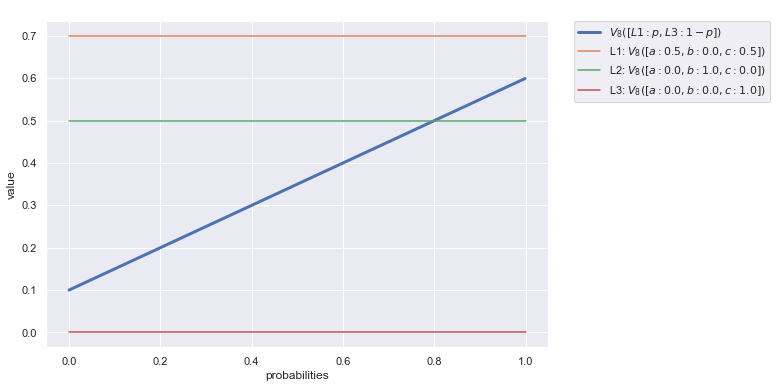

In [6]:
xs = np.arange(0.0, 1.0, 0.001)

L2 = [LC(prize=A, pr=0.0),  
      LC(prize=B, pr=1.0),  
      LC(prize=C, pr=0.0)]

L1 = [LC(prize=A, pr=0.5),  
      LC(prize=B, pr=0.0),  
      LC(prize=C, pr=0.5)]

L3 = [LC(prize=A, pr=0.0),  
      LC(prize=B, pr=0.0),  
      LC(prize=C, pr=1.0)]


ys = [v8([LC(prize=L1, pr=p), LC(prize=L3, pr=(1-p))]) for p in xs] 


#ys_EU = [eu([LC(prize=L1, pr=p), LC(prize=L3, pr=(1-p))]) for p in xs] 
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(xs, ys, lw=3, label="$V_8([L1:p, L3:1-p])$")
#ax.plot(xs, ys_EU, "--", alpha=0.6, lw=2, label="$EU([L1:p, L3:1-p])$")

ax.plot([0,1], [v8(L1), v8(L1)], label="L1: $V_8({})$".format(print_lottery(L1)))
ax.plot([0,1], [v8(L2), v8(L2)], label="L2: $V_8({})$".format(print_lottery(L2)))
ax.plot([0,1], [v8(L3), v8(L3)], label="L3: $V_8({})$".format(print_lottery(L3)))

ax.set(xlabel='probabilities', ylabel='value',
       title=' ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

For the above lotteries:  $L_1=[a:0.5, c:0.5]$  and $L_3=[c:1]$, find a lottery $L_2$ such that: 

1. $L_1\mathrel{P_{V_8}} L_2\mathrel{P_{V_8}} L_3$
2. There is no $p$ such that  $L_2\mathrel{I_{V_8}} [L_1:p, L_3:(1-p)]$.  


In [7]:

def counter_example_continuity(p1,p2,p3):
    
    xs = np.arange(0.0, 1.0, 0.001)

    if math.fabs((p1+p2+p3) - 1) > 0.000000001: 
        print(f"Not a probability: {p1}, {p2}, {p3}")
    else:
        L1 = [LC(prize=A, pr=0.5),  
              LC(prize=B, pr=0.0),  
              LC(prize=C, pr=0.5)]

        L2 = [LC(prize=A, pr=p1),  
              LC(prize=B, pr=p2),  
              LC(prize=C, pr=p3)]

        L3 = [LC(prize=A, pr=0.0),  
              LC(prize=B, pr=0.0),  
              LC(prize=C, pr=1.0)]


        if v8(L1) > v8(L2) and v8(L2)> v8(L3):
            ys = [v8([LC(prize=L1, pr=p), LC(prize=L3, pr=(1-p))]) for p in xs] 


            fig, ax = plt.subplots(figsize=(9,6))
            ax.plot(xs, ys, lw=3, label="$V_8([L1:p, L3:1-p])$")

            ax.plot([0,1], [v8(L1), v8(L1)], label="L1: $V_8({})$".format(print_lottery(L1)))
            ax.plot([0,1], [v8(L2), v8(L2)], label="L2: $V_8({})$".format(print_lottery(L2)))
            ax.plot([0,1], [v8(L3), v8(L3)], label="L3: $V_8({})$".format(print_lottery(L3)))

            ax.set(xlabel='probabilities', ylabel='value',
                   title=' ')
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

            plt.show()
        else: 
            if not v8(L1) > v8(L2):
                display(Math("L_1 = " + print_lottery(L1)))
                display(Math("L_2 = " + print_lottery(L2)))

                display(Math("V_8(L_1) = " + str(round(v8(L1), 3))))
                display(Math("V_8(L_2) = " + str(round(v8(L2), 3))))
                display(Math("L_2\mathrel{R_{V_8}} L_1"))
                
            if not v8(L2)> v8(L3):
                display(Math("L_2 = " + print_lottery(L2)))
                display(Math("L_3 = " + print_lottery(L3)))
                display(Math("V_8(L_2) = " + str(round(v8(L2), 3))))
                display(Math("V_8(L_3) = " + str(round(v8(L3), 3))))                
                display(Math("L_3\mathrel{R_{V_8}} L_2"))
    
interact_manual(counter_example_continuity, 
                p1=widgets.FloatSlider(min=0.0, max=1.0, value=0.0, step=0.01, description="$p(a)=$"),
                p2=widgets.FloatSlider(min=0.0, max=1.0, value=0.0, step=0.01, description="$p(b)=$"), 
                p3=widgets.FloatSlider(min=0.0, max=1.0, value=0.0, step=0.01, description="$p(c)=$"))

print()

interactive(children=(FloatSlider(value=0.0, description='$p(a)=$', max=1.0, step=0.01), FloatSlider(value=0.0…